# The India's Accident Risk prediction


018ec5b4-b5d5-4a6a-8de9-acde1bee157c.avif

# Introduction


Road accidents are a significant public health and safety concern in India, leading to numerous fatalities, injuries, and significant economic costs. This project aims to predict accident risk using machine learning by analyzing historical accident data.

# Description


India recorded the highest number of road crash fatalities in 2022, with over 1.68lakhs deaths, averaging 462 per day or one every three minutes. the ministry of road transport and highways is yet to release the official data, but source indicates a 9% increased compared to 2011 and an 11.5% increase from 2019.


# objective


The goal is to develop a Reggression classifier or suitable ML model to predict the accident risk using historical data, weather conditions, road condition and other factors. By analyzing accident data, cleaning data, and building predictive models, this project aims to enhance early warning systems, improve resource allocation, and support risk assessment for accident risk management.


# Explanation of Dataset Fields for Accident Analysis

**State Name**: The Indian state where the accident occurred.

**City Name**: The specific city or town within the state.

**Year**: The year in which the accident happened.

**Month**: The month of the incident.

**Day of Week**: Day of the week.

**Time of Day**: The time the accident occurred.

**Accident Severity**: Classification such as minor, major, or fatal.

**Number of Vehicles Involved**: Total vehicles involved in the crash.

**Vehicle Type Involved**: Types of vehicles.

**Number of Casualties**: Total people injured.

**Number of Fataliti**es: Total people who lost their lives.

**Weather Conditions**: Weather at the time.

**Road Type**: Type of road.

**Road Condition**: Surface condition.

**Lighting Condition**s: Whether it was daylight, dawn/dusk, or dark.

**Traffic Control Presence**: Were traffic signals or personnel present.

**Speed Limit (km/h)**: Posted speed limit in the area.

**Driver Age**: Age of the primary driver involved.

**Driver Gender**: Male, Female, or Other.

**Driver License Status**: Whether the driver had a valid license.

**Alcohol Involvement**: Whether alcohol was a factor (Yes/No).

**Accident Location Details**: Specific location details.



# Loading Dataset

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read the dataset
df = pd.read_csv('accident_prediction_india.csv')
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [ ]:
# find the last 5 rows
df.tail()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge
2999,Arunachal Pradesh,Unknown,2020,September,Monday,7:19,Fatal,5,Cycle,1,...,National Highway,Under Construction,Daylight,NaN,40,66,Male,NaN,Yes,Bridge


# Exploratory Data Analysis (Inital - EDA)

In [ ]:
# find all detail of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [ ]:
# find the shape
df.shape

(3000, 22)

In [ ]:
# find the descriptive statistics for numerical features
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [ ]:
# find the null values
df.isnull().sum()

,0
State Name,0
City Name,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Accident Severity,0
Number of Vehicles Involved,0
Vehicle Type Involved,0
Number of Casualties,0


In [ ]:
# find the nunique values
df.nunique()

,0
State Name,32
City Name,28
Year,6
Month,12
Day of Week,7
Time of Day,1263
Accident Severity,3
Number of Vehicles Involved,5
Vehicle Type Involved,7
Number of Casualties,11


In [ ]:
# find the duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
#find the categorical features

categorical_features=df.select_dtypes(include=['object']).columns
categorical_features

Index(['State Name', 'City Name', 'Month', 'Day of Week', 'Time of Day',
       'Accident Severity', 'Vehicle Type Involved', 'Weather Conditions',
       'Road Type', 'Road Condition', 'Lighting Conditions',
       'Traffic Control Presence', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [ ]:
#find the numerical features

numerical_features=df.select_dtypes(include=np.number).columns
numerical_features

Index(['Year', 'Number of Vehicles Involved', 'Number of Casualties',
       'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age'],
      dtype='object')

# Observation



*   There is no duplicated values in the data set.
*   Missing values are there in two categorical columns so have to encode the values in order to perform machine learning modules.
* Alcohol Involvement details will be the target variable.





# Data Visulization (EDA)

In [ ]:
# Analyse the distrubution for categorical columns

categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['State Name', 'City Name', 'Month', 'Day of Week', 'Time of Day',
       'Accident Severity', 'Vehicle Type Involved', 'Weather Conditions',
       'Road Type', 'Road Condition', 'Lighting Conditions',
       'Traffic Control Presence', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

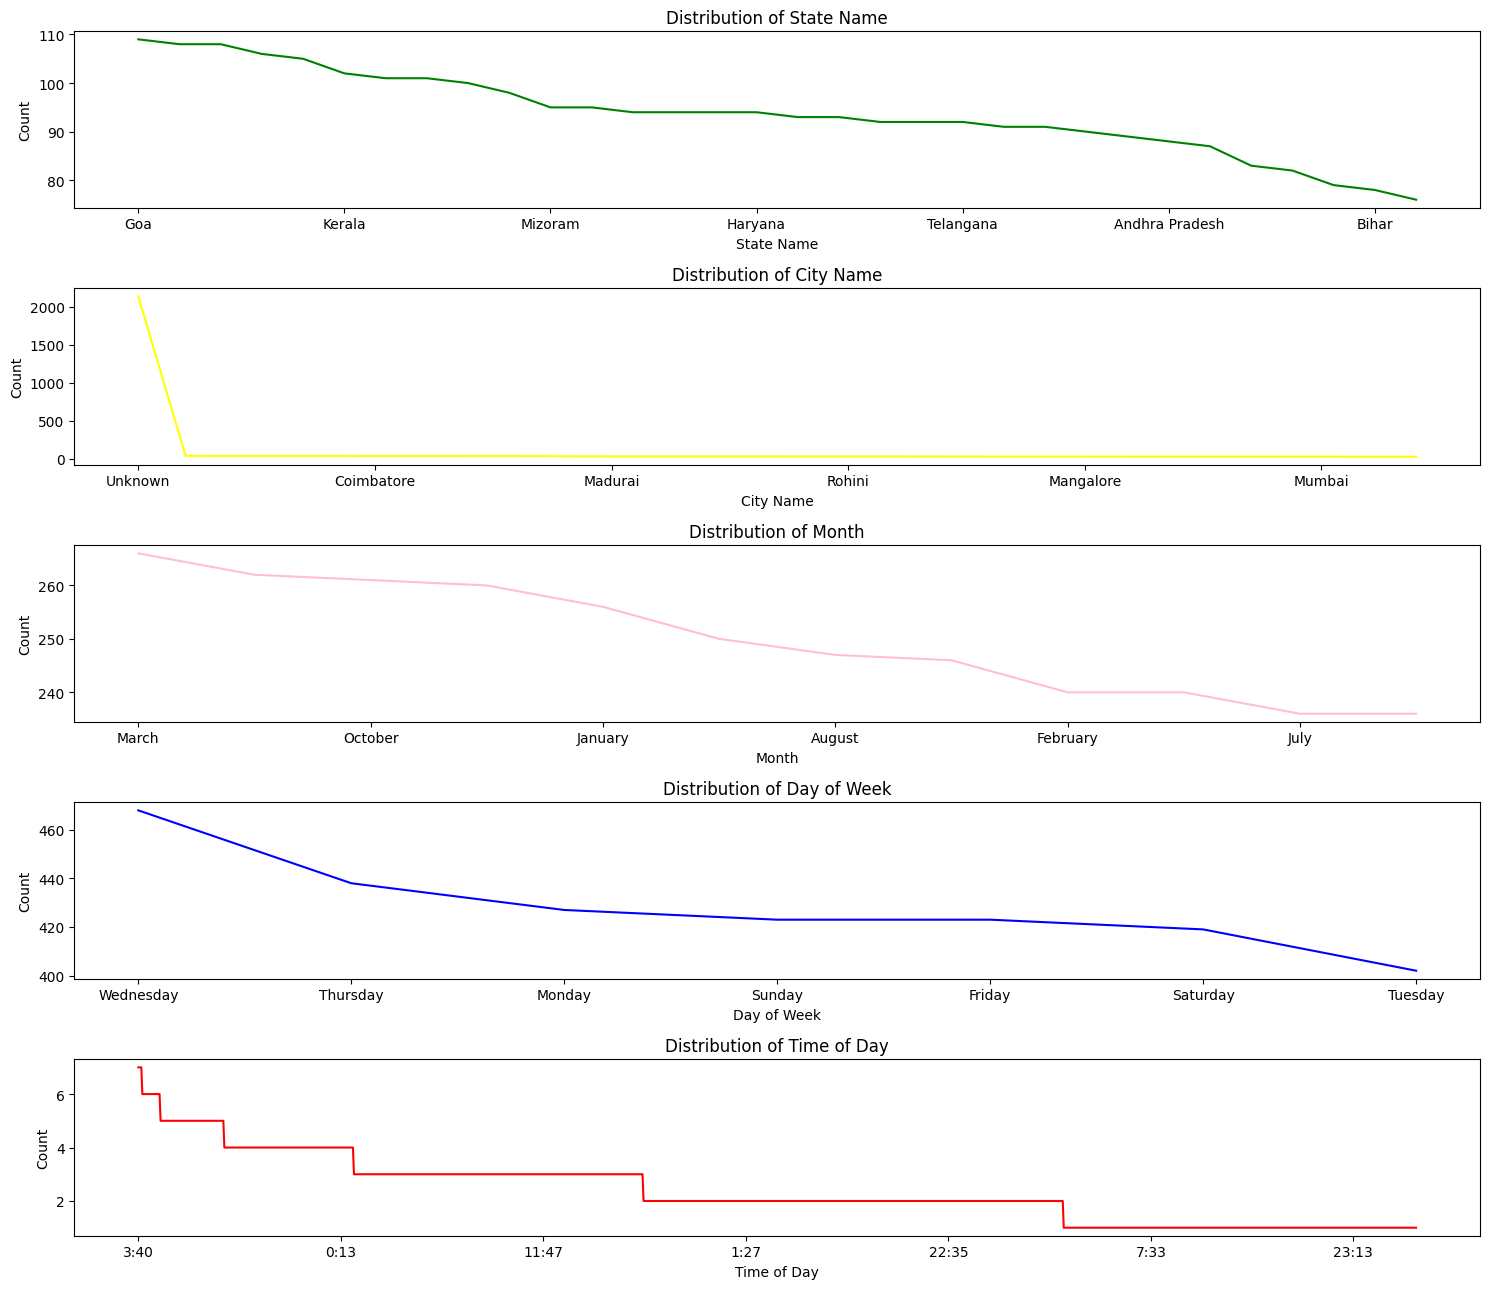

In [ ]:
fig,axes=plt.subplots(nrows=5,figsize=(15,13))

colors=['green','yellow','pink','blue','red']

for col , axis,color in zip(categorical_columns,axes.flatten(),colors):
  df[col].value_counts().plot(kind='line',ax=axis,color=color)
  axis.set_title(f"Distribution of {col}")
  axis.set_xlabel(col)
  axis.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Analyse the numerical column

numerical_columns=df.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['Year', 'Number of Vehicles Involved', 'Number of Casualties',
       'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age'],
      dtype='object')

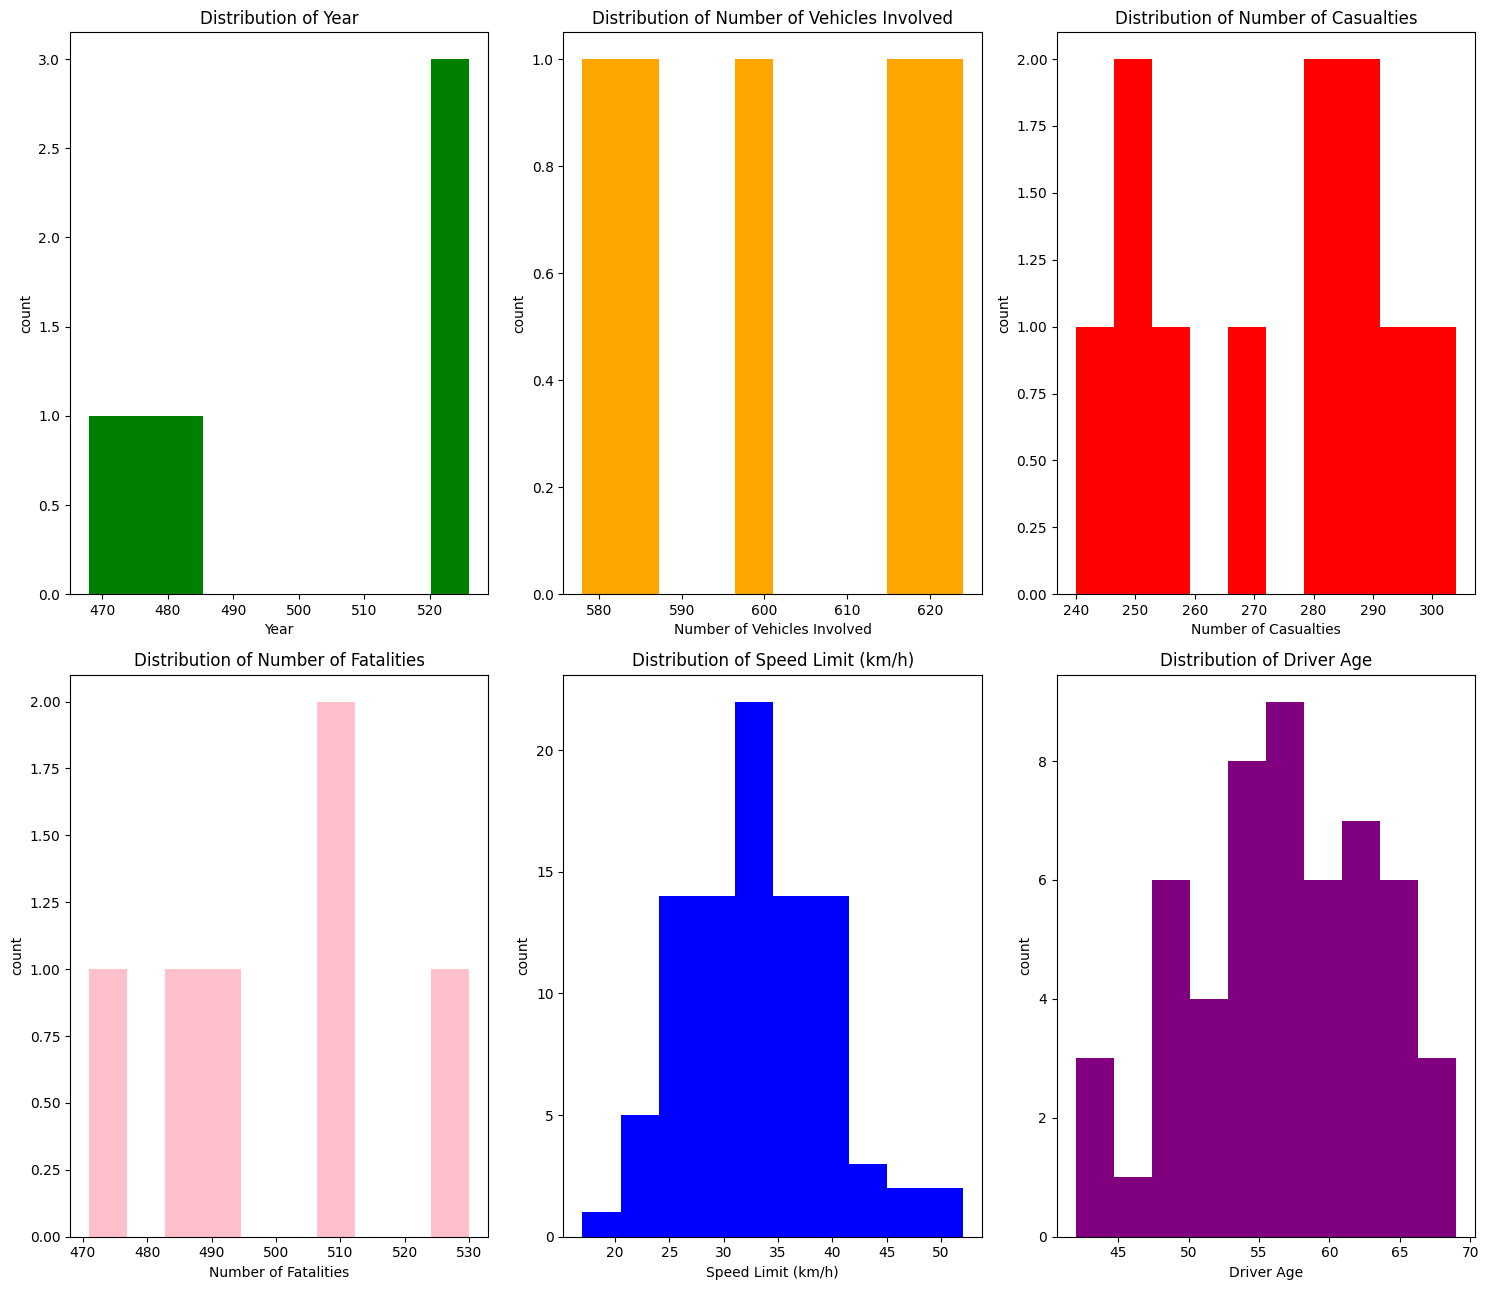

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,13))
colors=['green','orange','red','pink','blue','purple']

for col,axis,color in zip(numerical_columns,axes.flatten(),colors):
  df[col].value_counts().plot(kind='hist',bins=10,ax=axis,color=color)
  axis.set_title(f"Distribution of {col}")
  axis.set_xlabel(col)
  axis.set_ylabel('count')
plt.tight_layout()
plt.show()


## Univariate

Text(0.5, 1.0, 'Top 10 Cities with Most Accidents')

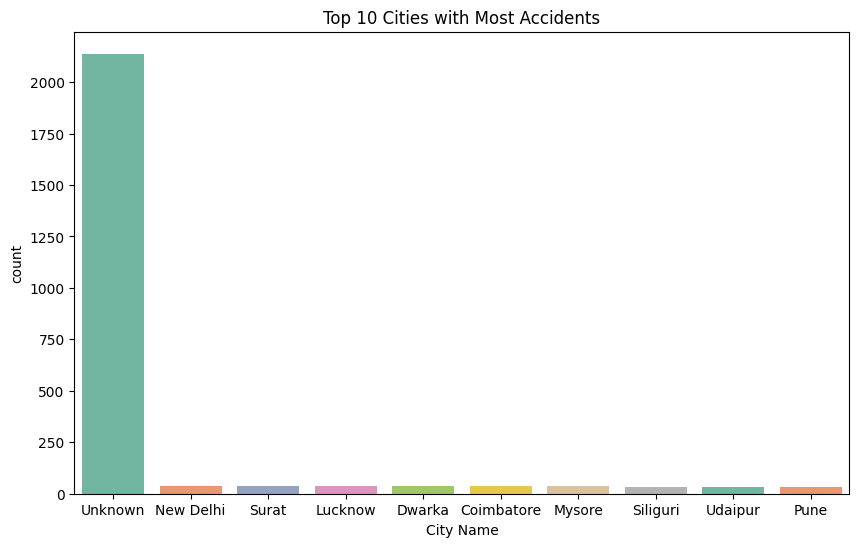

In [ ]:
#  the Top 10 cities with most accidents

plt.figure(figsize=(10,6))
sns.countplot(x='City Name',data=df,palette='Set2',order=df['City Name'].value_counts().index[:10])
plt.title('Top 10 Cities with Most Accidents')



Explanation:

The Top 10 cities with  the most accidents in this unknown city was stands first with high counts of accidents to comparing with other cities.


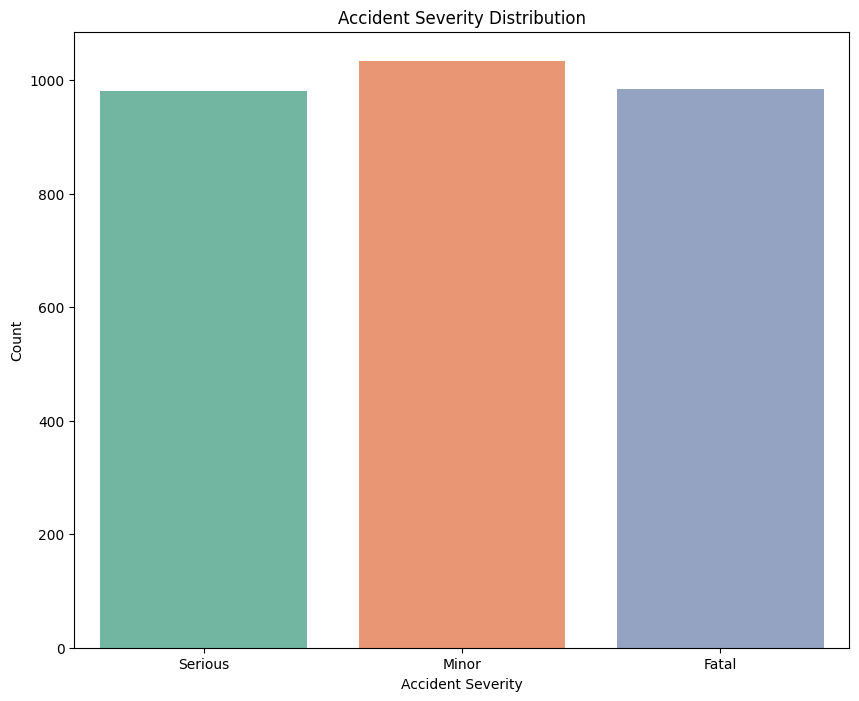

In [ ]:
#  the Accident Severity distribution


plt.figure(figsize=(10,8))
sns.countplot(x='Accident Severity',data=df,palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


Explanation:

In this case Accident severity shows the minor level and also fatal level incresed more than the serious conditions. The thing is serious condition stands in lower which is comparing with minor and fatal.

There is no huge difference between minor and fatal conditions.


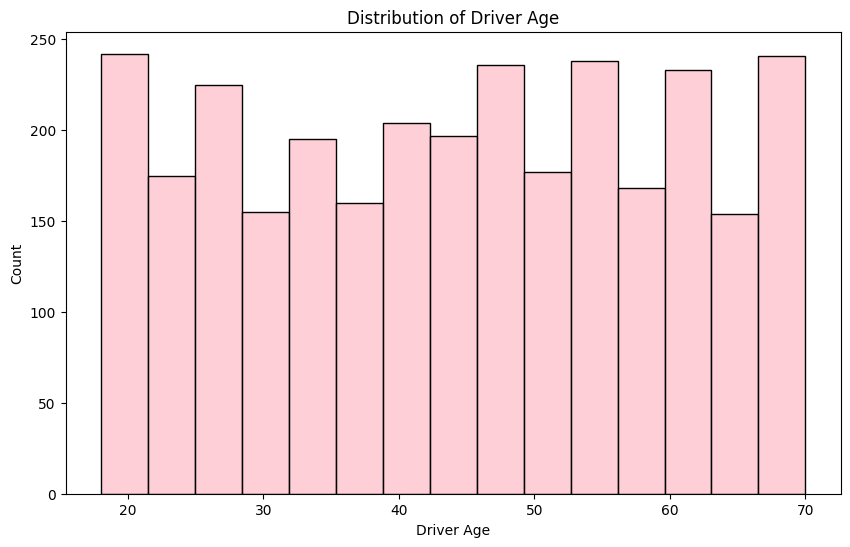

In [ ]:
# the Distribution of driver age

plt.figure(figsize=(10,6))
sns.histplot(x='Driver Age',data=df,palette='Set2',color='pink')
plt.title('Distribution of Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.show()



Explanation:

The distrubution of driver age indicates age of 20 to 70 are drivers,but most of the drivers age starts from 20 and the people of above 40 age are more drivers and also 20 age people are driving.
other categories also drivers but plot shows large amount of people are from young and above 40.


## Bivariate

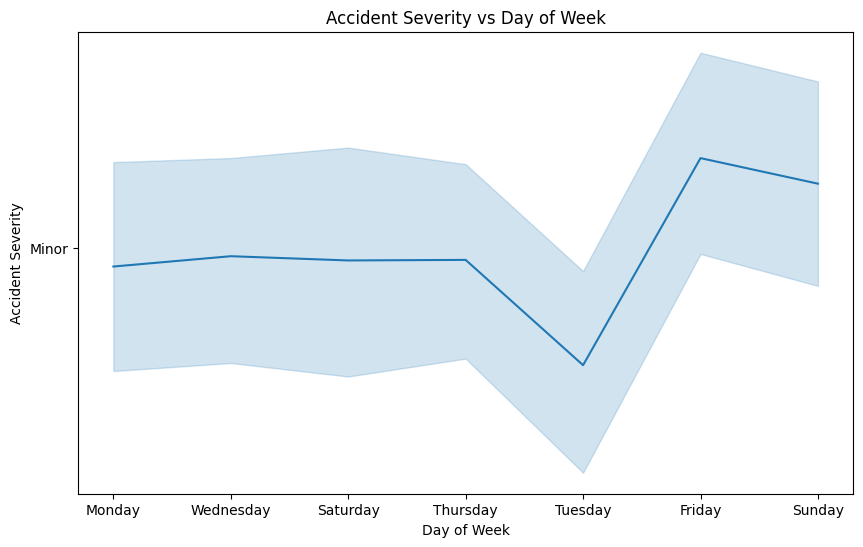

In [ ]:
#  the Accident severity vs Day Of Week

plt.figure(figsize=(10,6))
sns.lineplot(x='Day of Week',y='Accident Severity',data=df,palette='Set2')
plt.title('Accident Severity vs Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
plt.show()


Explanation:



*   In this lineplot shows the accident severity where the high level accidents happens Day of week.
*   Most of the accident happen on friday.less accidents happens on tuesday. sunday is stands in second place for high accidents.


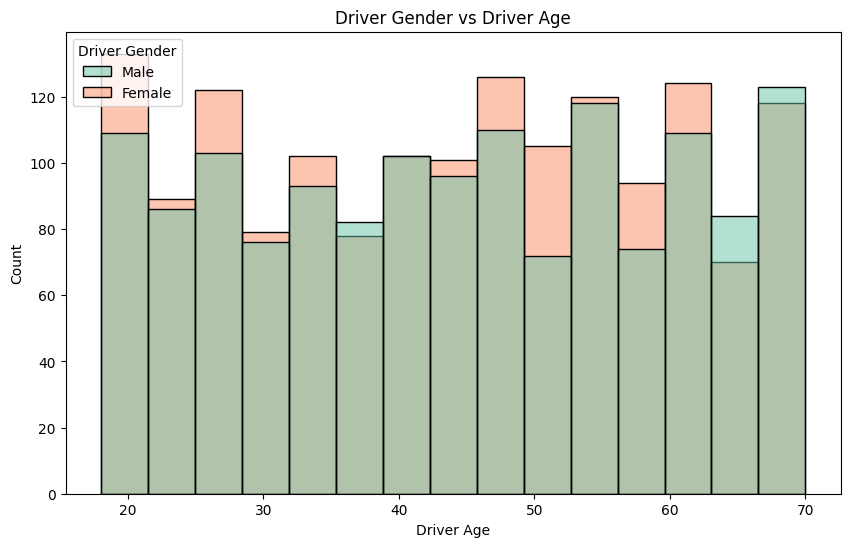

In [ ]:
# find the Driver gender vs Driver Age

plt.figure(figsize=(10,6))
sns.histplot(x='Driver Age',hue='Driver Gender',data=df,palette='Set2')
plt.title('Driver Gender vs Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.show()


 Explanation:

This indicates that female drivers are more in the age of above 50. and age of 20.

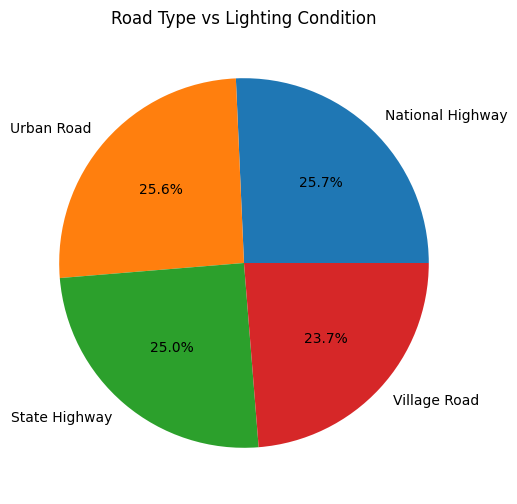

In [ ]:
# find the Road Type vs Lighting Condition

plt.figure(figsize=(10,6))
plt.pie(df['Road Type'].value_counts(),labels=df['Road Type'].unique(),autopct='%1.1f%%')
plt.title('Road Type vs Lighting Condition')
plt.show()




Explanation:

The village road only 23.7% light conditions. and other type of raod and its lightconditions are similarly same with 25%. In this the concentration should incerese in village raod type.

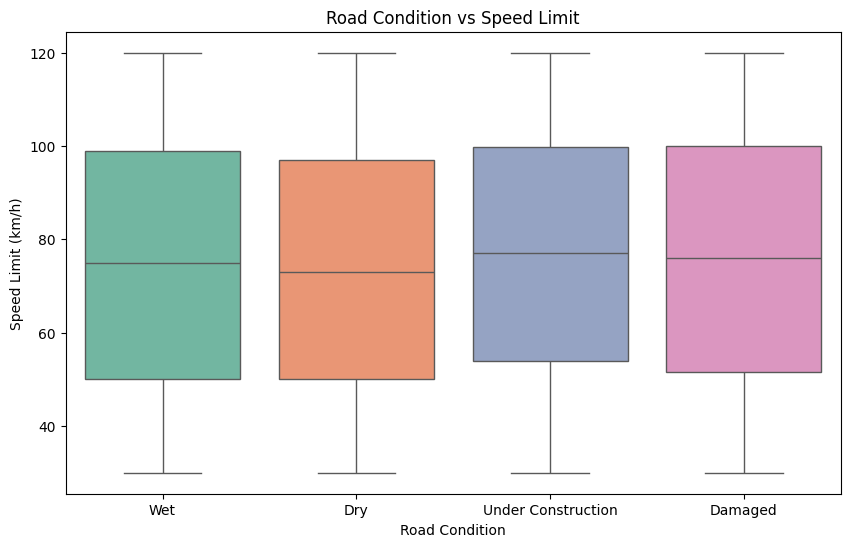

In [ ]:
# find the  Road condition vs Speed Limit(km/h)

plt.figure(figsize=(10,6))
sns.boxplot(x='Road Condition',y='Speed Limit (km/h)',data=df,palette='Set2')
plt.title('Road Condition vs Speed Limit')
plt.xlabel('Road Condition')
plt.ylabel('Speed Limit (km/h)')
plt.show()

Explanation:

Road conditions and speed limit has taken.in this under the constrution, damaged road, wet road were drivers rised their speed level above 100. and these three road conditions are typically very danger to get speed more than 60km speed. but the drivers crossed 100km speed.

## Multivariate

                                 Year  Number of Vehicles Involved  \
Year                         1.000000                    -0.026431   
Number of Vehicles Involved -0.026431                     1.000000   
Number of Casualties         0.027297                     0.004416   
Number of Fatalities        -0.000689                     0.038528   
Speed Limit (km/h)          -0.015431                    -0.001969   
Driver Age                  -0.022658                    -0.011472   

                             Number of Casualties  Number of Fatalities  \
Year                                     0.027297             -0.000689   
Number of Vehicles Involved              0.004416              0.038528   
Number of Casualties                     1.000000             -0.008707   
Number of Fatalities                    -0.008707              1.000000   
Speed Limit (km/h)                       0.023294             -0.008957   
Driver Age                              -0.007032          

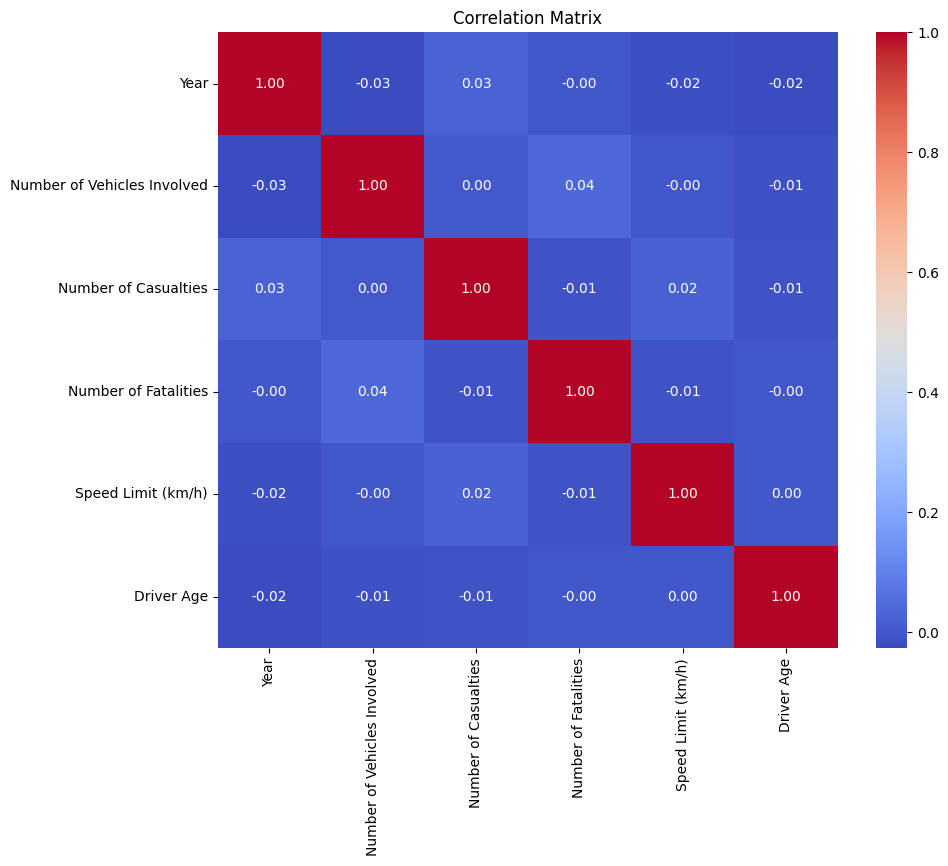

In [ ]:
# correlation matrix
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Explanation :

This heat map indicates the correlation matrix of the numerical columns.
There is equal positive and negative correlation between these columns.

<Figure size 2000x2000 with 0 Axes>

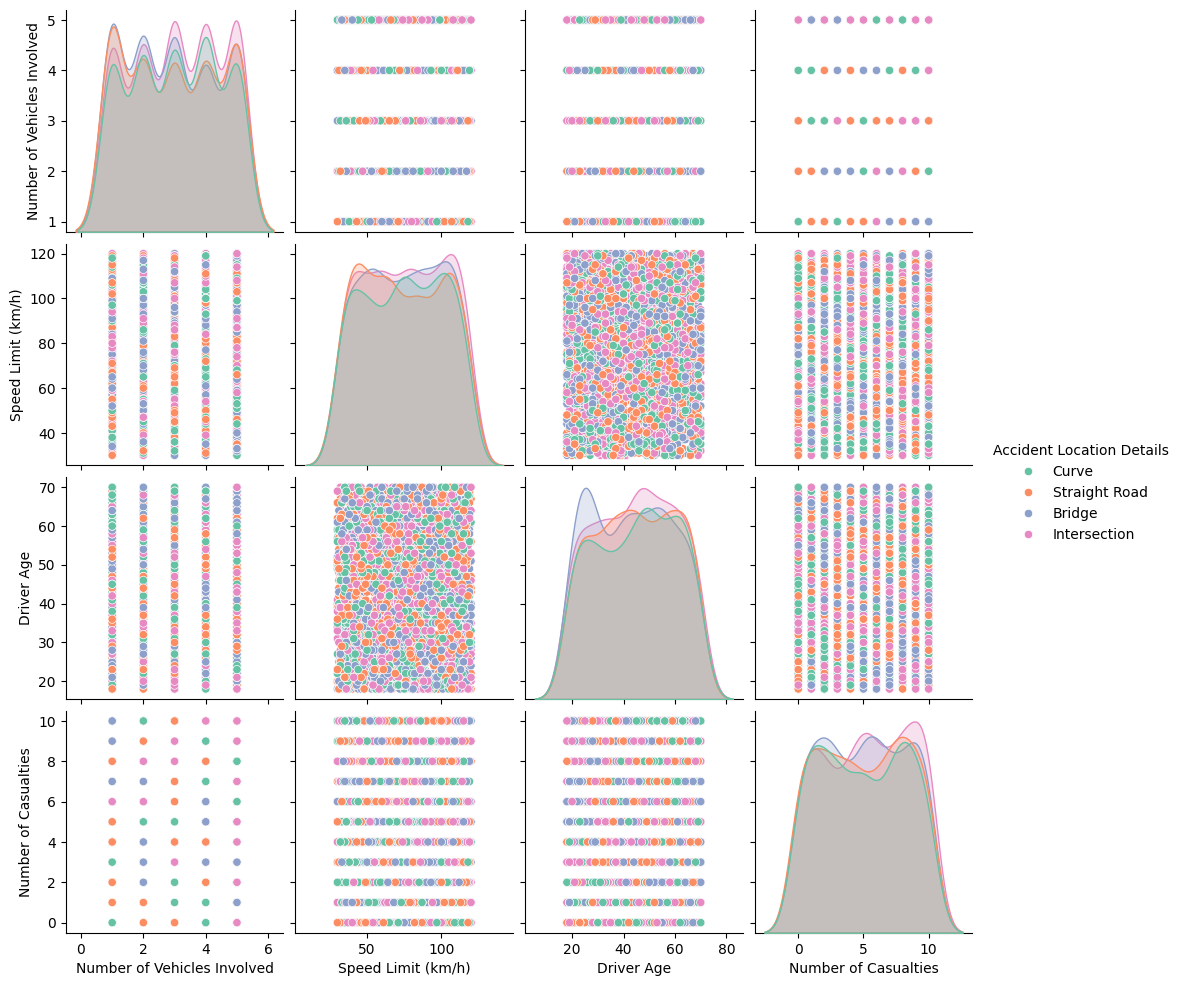

In [ ]:
# License status & alcohol involvement

selected_features=['Number of Vehicles Involved','Speed Limit (km/h)','Driver Age','Number of Casualties']

plt.figure(figsize=(20,20))
sns.pairplot(data=df,vars=selected_features,hue='Accident Location Details',palette='Set2')
plt.show()

Explanation:

In this pairplot, selection features are Number of Vehicles Involved,Speed Limit (km/h),Driver Age,Number of Casualties score by accident location details.there are slight difference are happens.

# Observation

Before the pre processing this visualization was done.the thing is can easily understand the dataset with the different type of plots which is used for understanding the issues in easier and to know the severity of the issues.
the next step for further analysis is the preprocessing.


# Data Preprocessing


In [ ]:
# null values
df.isnull().sum()

,0
State Name,0
City Name,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Accident Severity,0
Number of Vehicles Involved,0
Vehicle Type Involved,0
Number of Casualties,0


In [ ]:
# fill the missing values in the dataset
df['Traffic Control Presence'].fillna(df['Traffic Control Presence'].mode()[0], inplace=True)

df['Driver License Status'].fillna(df['Driver License Status'].mode()[0], inplace=True)

In [ ]:
# null values
df.isnull().sum()

,0
State Name,0
City Name,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Accident Severity,0
Number of Vehicles Involved,0
Vehicle Type Involved,0
Number of Casualties,0


In [ ]:
# finding IQR for numerical columns


Numerical_columns=df.select_dtypes(include=['int64','float64']).columns
# find IQR for dataframe
Q1=df[numerical_columns].quantile(0.25)
Q3=df[numerical_columns].quantile(0.75)


IQR=Q3 - Q1

print(IQR)


Year                            3.0
Number of Vehicles Involved     2.0
Number of Casualties            6.0
Number of Fatalities            3.0
Speed Limit (km/h)             48.0
Driver Age                     26.0
dtype: float64


In [ ]:
#find lower and upper bound

lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

Year                           2014.5
Number of Vehicles Involved      -1.0
Number of Casualties             -7.0
Number of Fatalities             -3.5
Speed Limit (km/h)              -21.0
Driver Age                       -8.0
dtype: float64
Year                           2026.5
Number of Vehicles Involved       7.0
Number of Casualties             17.0
Number of Fatalities              8.5
Speed Limit (km/h)              171.0
Driver Age                       96.0
dtype: float64


In [ ]:
# find the outliers

outliers=(df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
print(outliers.sum())


Year                           0
Number of Vehicles Involved    0
Number of Casualties           0
Number of Fatalities           0
Speed Limit (km/h)             0
Driver Age                     0
dtype: int64



No outliers in this dataset.

In [ ]:
# Find the skewness
df[numerical_columns].skew()

,0
Year,-0.035564
Number of Vehicles Involved,0.000849
Number of Casualties,-0.026621
Number of Fatalities,0.032816
Speed Limit (km/h),-0.013468
Driver Age,-0.044036


Skewness score:

 0 : almost perfectly symmetrical distribution.

 0 : no skew, the data is very well-balanced.

Slight negative skew, but extremely minimal.

Slight positive skew, nearly symmetrical.

Almost no skew, very balanced distribution.

Slight left skew, but barely noticeable.

# Feature Engineering

In [ ]:
# Make a copy of the original dataframe
df_2 = df.copy()

In [ ]:
# create a cat_columns for df_2
cat_columns=df_2.select_dtypes(include=['object']).columns
cat_columns

Index(['State Name', 'City Name', 'Month', 'Day of Week', 'Time of Day',
       'Accident Severity', 'Vehicle Type Involved', 'Weather Conditions',
       'Road Type', 'Road Condition', 'Lighting Conditions',
       'Traffic Control Presence', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [ ]:
# Label Encoding for categorical column
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

for col in cat_columns:
    df_2[col] = Label_Encoder.fit_transform(df_2[col])

In [ ]:
df_2.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,11,23,2021,8,1,604,2,5,3,0,...,0,3,0,2,61,66,1,1,1,1
1,29,10,2018,4,6,693,1,5,5,5,...,2,1,3,2,92,60,1,1,1,3
2,5,23,2023,8,6,1020,1,5,4,6,...,0,2,1,2,120,26,0,1,0,0
3,29,10,2020,6,2,23,1,3,1,10,...,1,1,0,1,76,34,0,1,1,3
4,25,23,2021,1,4,113,1,5,3,7,...,2,3,3,2,115,30,1,1,0,2


# Feature Selection

In [ ]:
# feature selection
# select the features and target


features = df_2.drop(['Alcohol Involvement','State Name','City Name','Year','Month','Day of Week','Time of Day'],axis= 1)
target = 'Alcohol Involvement'
x = df_2[features.columns]
y = df_2[target]
x.head()

,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Number of Fatalities,Weather Conditions,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Accident Location Details
0,2,5,3,0,4,2,0,3,0,2,61,66,1,1,1
1,1,5,5,5,4,2,2,1,3,2,92,60,1,1,3
2,1,5,4,6,5,1,0,2,1,2,120,26,0,1,0
3,1,3,1,10,5,3,1,1,0,1,76,34,0,1,3
4,1,5,3,7,1,1,2,3,3,2,115,30,1,1,2


# Model Training and Testing

In [ ]:
# Split the data into training and testing sets.

# split the dataset into train 80% test 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(f'Dataset shape:{df_2.shape}')
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')

Dataset shape:(3000, 22)
x_train shape:(2400, 15)
x_test shape:(600, 15)
y_train shape:(2400,)
y_test shape:(600,)


In [ ]:
y_train.value_counts()

,count
Alcohol Involvement,
1,1213
0,1187


In [ ]:
# Check the class balance in both sets

print("Train Distribution:\n", y_train.value_counts(normalize=True))
print("Test Distribution:\n", y_test.value_counts(normalize=True))

Train Distribution:
 Alcohol Involvement
1    0.505417
0    0.494583
Name: proportion, dtype: float64
Test Distribution:
 Alcohol Involvement
1    0.511667
0    0.488333
Name: proportion, dtype: float64


# Feature Scaling

In [ ]:
# import the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting and transforming
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


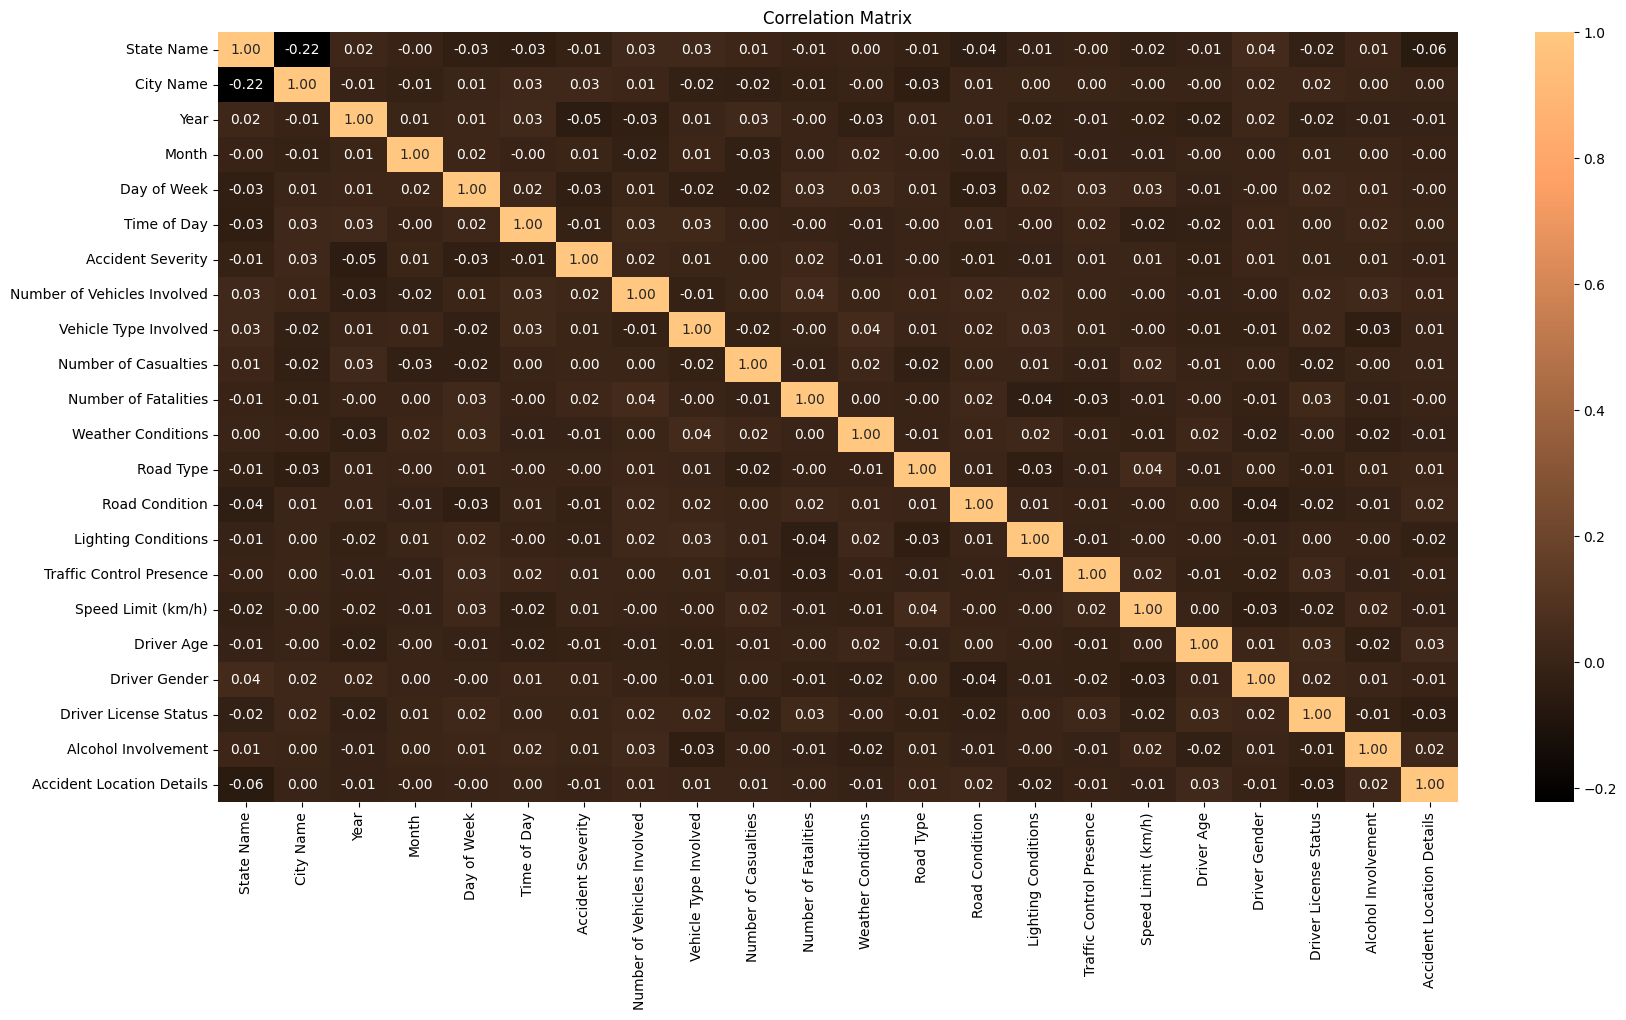

In [ ]:
# correlation matrix
correlation_matrix = df_2.corr()

# heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Model Building**

# Logistic Regression

In [ ]:
#build logistic regression model
from sklearn.linear_model import LogisticRegression
logis_model=LogisticRegression()
logis_model=logis_model.fit(x_train_scaled,y_train)

#predict the model
logis_pred=logis_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,logis_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,logis_pred)}')
print(f'Classification Report : {classification_report(y_test,logis_pred)}')

Accuracy Score : 0.5133333333333333
Confusion Matrix : [[130 163]
 [129 178]]
Classification Report :               precision    recall  f1-score   support

           0       0.50      0.44      0.47       293
           1       0.52      0.58      0.55       307

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



# KNeighbors Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_model=KNeighborsClassifier()
kn_model=kn_model.fit(x_train_scaled,y_train)

#predict the model
kn_pred=kn_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,kn_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,kn_pred)}')
print(f'Classification Report : {classification_report(y_test,kn_pred)}')


Accuracy Score : 0.49
Confusion Matrix : [[138 155]
 [151 156]]
Classification Report :               precision    recall  f1-score   support

           0       0.48      0.47      0.47       293
           1       0.50      0.51      0.50       307

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model=dt_model.fit(x_train_scaled,y_train)

#predict the model
dt_pred=dt_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,dt_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,dt_pred)}')
print(f'Classification Report : {classification_report(y_test,dt_pred)}')

Accuracy Score : 0.4483333333333333
Confusion Matrix : [[130 163]
 [168 139]]
Classification Report :               precision    recall  f1-score   support

           0       0.44      0.44      0.44       293
           1       0.46      0.45      0.46       307

    accuracy                           0.45       600
   macro avg       0.45      0.45      0.45       600
weighted avg       0.45      0.45      0.45       600



# RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rf_model=RandomForestClassifier()
Rf_model=Rf_model.fit(x_train_scaled,y_train)

#predict the model
Rf_pred=Rf_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,Rf_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,Rf_pred)}')
print(f'Classification Report : {classification_report(y_test,Rf_pred)}')

Accuracy Score : 0.47833333333333333
Confusion Matrix : [[147 146]
 [167 140]]
Classification Report :               precision    recall  f1-score   support

           0       0.47      0.50      0.48       293
           1       0.49      0.46      0.47       307

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

Nb_model=GaussianNB()
Nb_model=Nb_model.fit(x_train_scaled,y_train)

#predict the model
Nb_pred=Nb_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,Nb_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,Nb_pred)}')
print(f'Classification Report : {classification_report(y_test,Nb_pred)}')


Accuracy Score : 0.49833333333333335
Confusion Matrix : [[129 164]
 [137 170]]
Classification Report :               precision    recall  f1-score   support

           0       0.48      0.44      0.46       293
           1       0.51      0.55      0.53       307

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train_scaled,y_train)

#predict the model
svm_pred=svm_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,svm_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,svm_pred)}')
print(f'Classification Report : {classification_report(y_test,svm_pred)}')


Accuracy Score : 0.51
Confusion Matrix : [[144 149]
 [145 162]]
Classification Report :               precision    recall  f1-score   support

           0       0.50      0.49      0.49       293
           1       0.52      0.53      0.52       307

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier()
xgb_model=xgb_model.fit(x_train_scaled,y_train)

#predict the model

xgb_pred=xgb_model.predict(x_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print(f'Accuracy Score : {accuracy_score(y_test,xgb_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,xgb_pred)}')
print(f'Classification Report : {classification_report(y_test,xgb_pred)}')


Accuracy Score : 0.46
Confusion Matrix : [[136 157]
 [167 140]]
Classification Report :               precision    recall  f1-score   support

           0       0.45      0.46      0.46       293
           1       0.47      0.46      0.46       307

    accuracy                           0.46       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.46      0.46      0.46       600



**Due to lack of low accuracry here using the OneHotEncoder, Hyperparameter Tuning.to get better accuracy.**

# OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = x.select_dtypes(include=["object", "category"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Apply the preprocessor to x_train to create x_train_transformed
x_train_transformed = preprocessor.fit_transform(x_train)

model = RandomForestClassifier()
model.fit(x_train_transformed, y_train)
importances = model.feature_importances_

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold="median")
x_selected = sfm.fit_transform(x_train_transformed, y_train)

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="f1_macro")
grid_search.fit(x_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

scores = cross_val_score(grid_search.best_estimator_, x_selected, y_train, cv=5, scoring="f1_macro")
print("Cross-validated F1 Score:", scores.mean())

Cross-validated F1 Score: 0.48631443383225126


In [ ]:
# Dictionary of the classifiers
classifiers={'Logistic Regression':LogisticRegression(),
             'K-Nearest Neighbors':KNeighborsClassifier(),
             'Decision Tree':DecisionTreeClassifier(),
             'Random Forest':RandomForestClassifier(),
             'Support Vector Machine':SVC(),
             'Naive Bayes':GaussianNB(),
             'XGBoost':XGBClassifier()}

results={}
#iterate through the classifier
for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  # Change here: Specify an appropriate average method for multiclass
  f1=f1_score(y_test,y_pred, average='weighted')
  results[name]={'Accuracy Score':accuracy,'f1 score':f1}

#convert the results dic to a Dataframe

results_df=pd.DataFrame(results).T
results_df

,Accuracy Score,f1 score
Logistic Regression,0.513333,0.511113
K-Nearest Neighbors,0.490000,0.489898
Decision Tree,0.445000,0.445069
Random Forest,0.475000,0.474861
Support Vector Machine,0.510000,0.509902
Naive Bayes,0.498333,0.496783
XGBoost,0.460000,0.460060


# Model Evaluation and Performance

# Comparing Model scores

In [ ]:
# Comparing each model with  Accuracy scores
model_accuracy_score = {
    'Logistic Regression': accuracy_score(y_test, logis_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, Rf_pred),
    'SVC': accuracy_score(y_test, svm_pred),
    'KNN': accuracy_score(y_test, kn_pred),
    'Gaussian Naive Bayes': accuracy_score(y_test, Nb_pred),
    'xgboost': accuracy_score(y_test, xgb_pred)
}

Accuracy_Scores = pd.DataFrame(list(model_accuracy_score.items()), columns=['Model', 'Accuracy Score'])
Accuracy_Scores = Accuracy_Scores.sort_values(by='Accuracy Score', ascending=False)
print(Accuracy_Scores)

                  Model  Accuracy Score
0   Logistic Regression        0.513333
3                   SVC        0.510000
5  Gaussian Naive Bayes        0.498333
4                   KNN        0.490000
2         Random Forest        0.478333
6               xgboost        0.460000
1         Decision Tree        0.448333


In [ ]:
# Comparing each model with F1 score
model_f1_score = {
    'Logistic Regression': f1_score(y_test, logis_pred,average="macro"),
    'Decision Tree': f1_score(y_test, dt_pred,average="macro"),
    'Random Forest': f1_score(y_test, Rf_pred,average="macro"),
    'SVC': f1_score(y_test, svm_pred,average="macro"),
    'KNN': f1_score(y_test, kn_pred,average="macro"),
    'Gaussian Naive Bayes': f1_score(y_test, Nb_pred,average="macro"),
    'xgboost': f1_score(y_test, xgb_pred,average="macro")
}

F1_Scores = pd.DataFrame(list(model_f1_score.items()), columns=['Model', 'F1 Score'])
F1_Scores = F1_Scores.sort_values(by='F1 Score', ascending=False)
print(F1_Scores)

                  Model  F1 Score
0   Logistic Regression  0.510199
3                   SVC  0.509559
5  Gaussian Naive Bayes  0.495980
4                   KNN  0.489541
2         Random Forest  0.478262
6               xgboost  0.459976
1         Decision Tree  0.448209


# Visualization of Model Performance

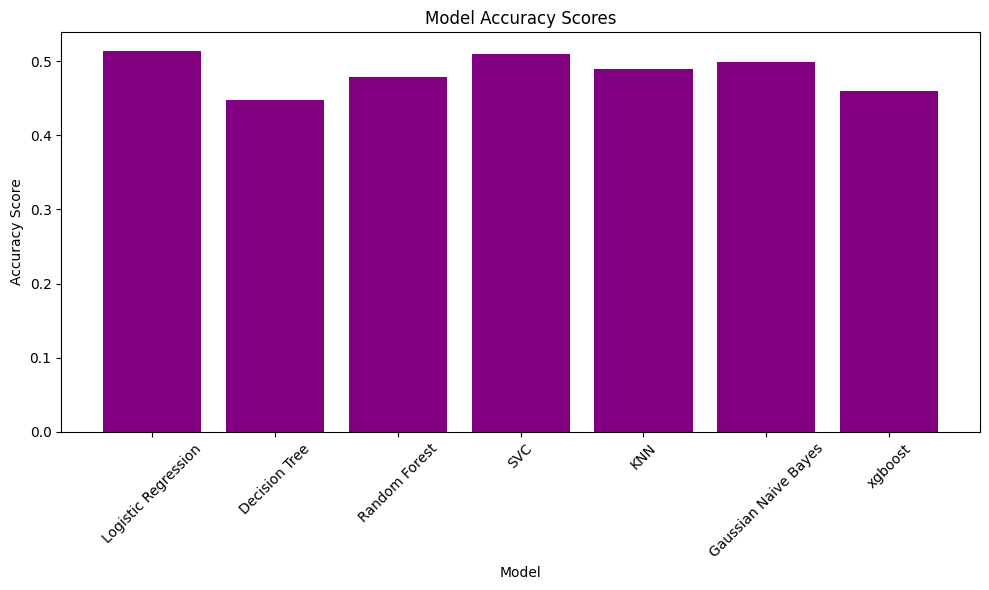

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_accuracy_score.keys(), model_accuracy_score.values(), color='purple')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()

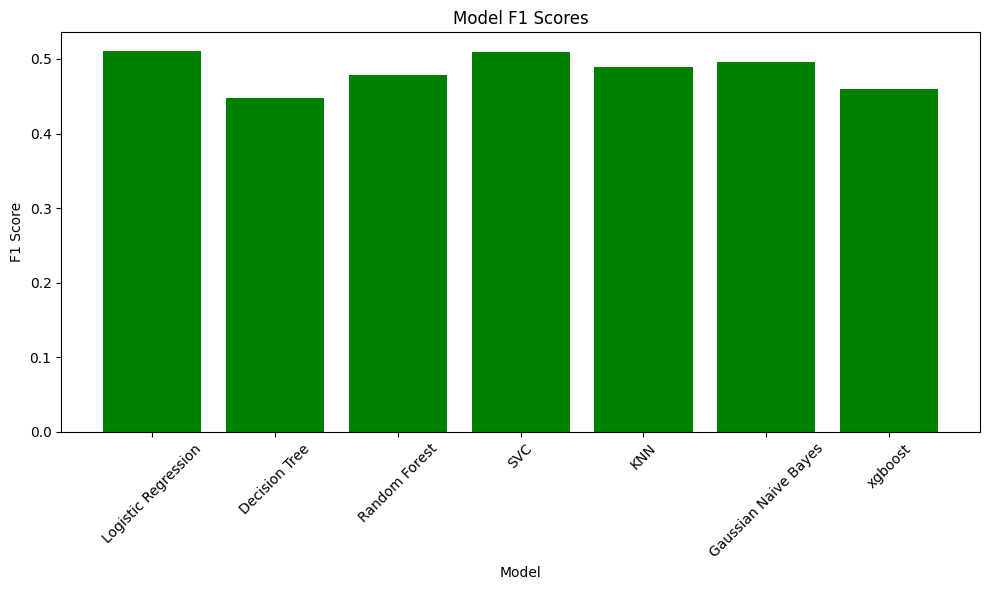

In [ ]:
# Visualization shows the Model Performance based on F1-score
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(model_f1_score.keys(), model_f1_score.values(), color='green')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Model F1 Scores')
plt.xticks(rotation=45)
plt.tight_layout()

# conclusion



**Model Comparison Result**

The model performance evaluation shows that

**Logistic Regression** achieved the highest accuracy of 51.33% and the highest F1-score of 51.01%, making it the best-performing model overall.

SVC model followed closely with an accuracy of 51.00% and an F1-score of 50.95%, while Gaussian Naive Bayes performed and KNN the same with 49.83% accuracy and an F1-score of 48.95%.

Random Forest performed also demonstrated competitive performance, achieving 47.87% accuracy and an F1-score of 47.87%.

On the other hand, Xgb boost and Decision Tree performed the worst achieving 46.00% accuracy and an F1-score of 45.99%, while Random Forest had the lowest accuracy at 44.83% and an F1-score of 44.82%.

Given these results, Logistic Regression 51.01% is the best choice for deployment due to its superior accuracy and F1-score. Future improvements could involve exploring deep learning methods to further enhance model performance.

Accuracy Score (Performance on Entire Dataset)

**Logistic Regression**  performed the best in terms of accuracy, meaning it correctly predicted most of the test set.

F1 Score (Performance on Individual Classes)

**Logistic Regression** has the highest F1 score (51.01%), meaning it performs well across both precision and recall.